In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [30]:
#Reading Global COIVD19 Dataset
#data = pd.read_csv("dataset/covid_19_clean_complete.csv", parse_dates = ['Date'])
data = pd.read_csv("drive/My Drive/4th Year/ML/COVID19_Prediction/dataset/covid_19_clean_complete.csv", parse_dates = ['Date'])
data.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
#Renaming column names for easy usage
data.rename(columns={
    'Date' : 'date',
    'Province/State' : 'state',
    'Country/Region' : 'country',
    'Lat' : 'lat',
    'Long' : 'long',
    'Confirmed' : 'confirmed',
    'Deaths' : 'deaths',
    'Recovered' : 'recovered'
}, inplace=True)

In [0]:
#creating new column to calculate active cases
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']

## **Visualizations of World Wide COIVD19 Records**


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

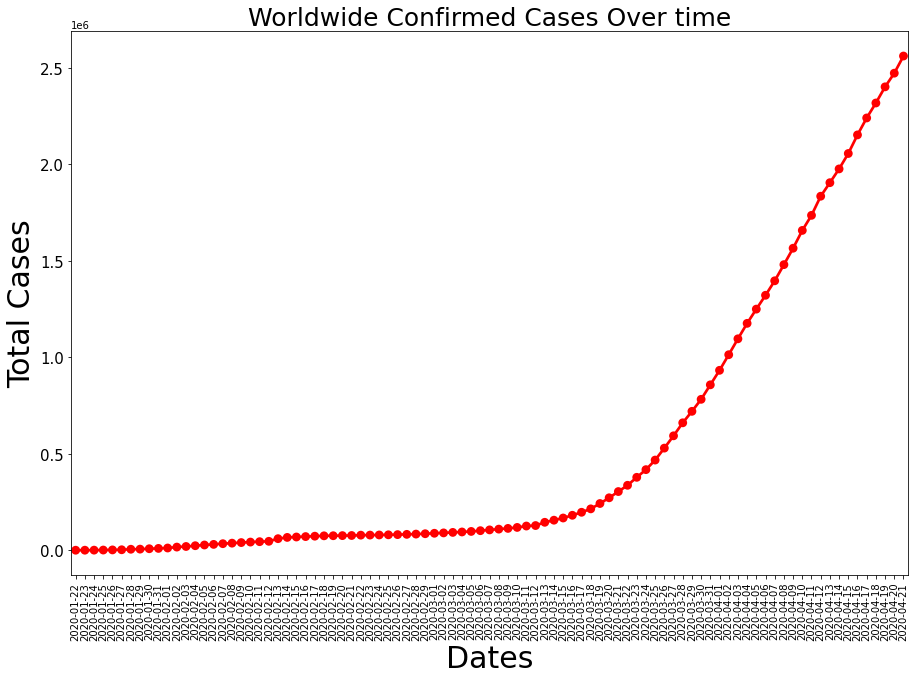

In [33]:
#Visualization of Worldwide confirmed cases
plt.figure(figsize=(15,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Dates', fontsize=30)
plt.ylabel('Total Cases', fontsize=30)
plt.title('Worldwide Confirmed Cases Over time', fontsize=25)
total_cases = data.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = 'r') 
ax.set(xlabel="Dates", ylabel="Total Cases")

In [0]:
#Get Top Countries which have more active cases
top_actives = data.groupby(by = 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

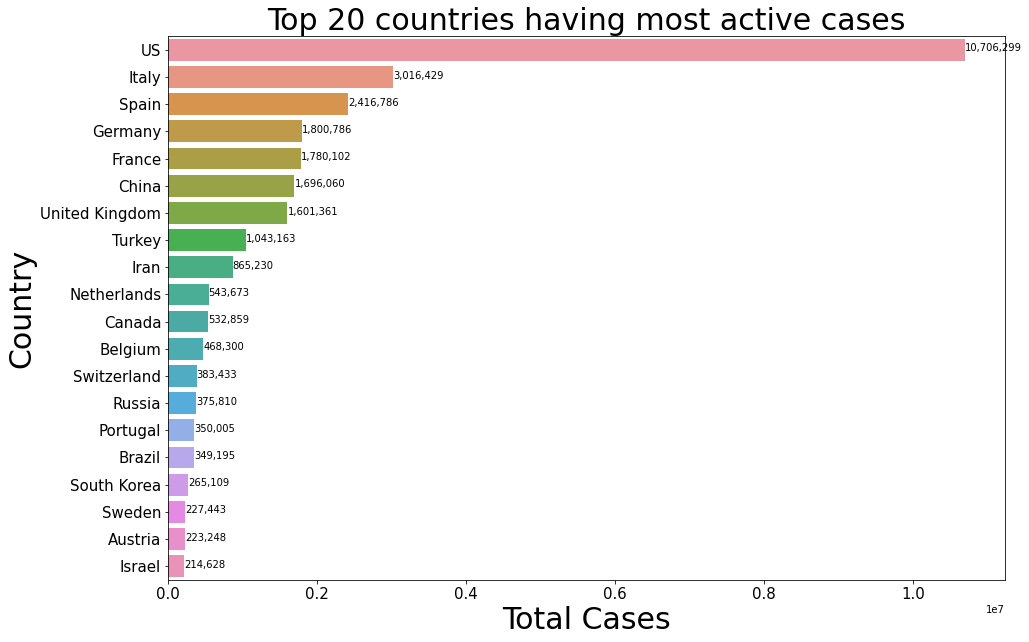

In [35]:
#Visualization of Top 20 Countries have Active Cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel('Country', fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total Cases', ylabel='Country')

In [0]:
#Get Top Countries which have more Death cases
top_deaths = data.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

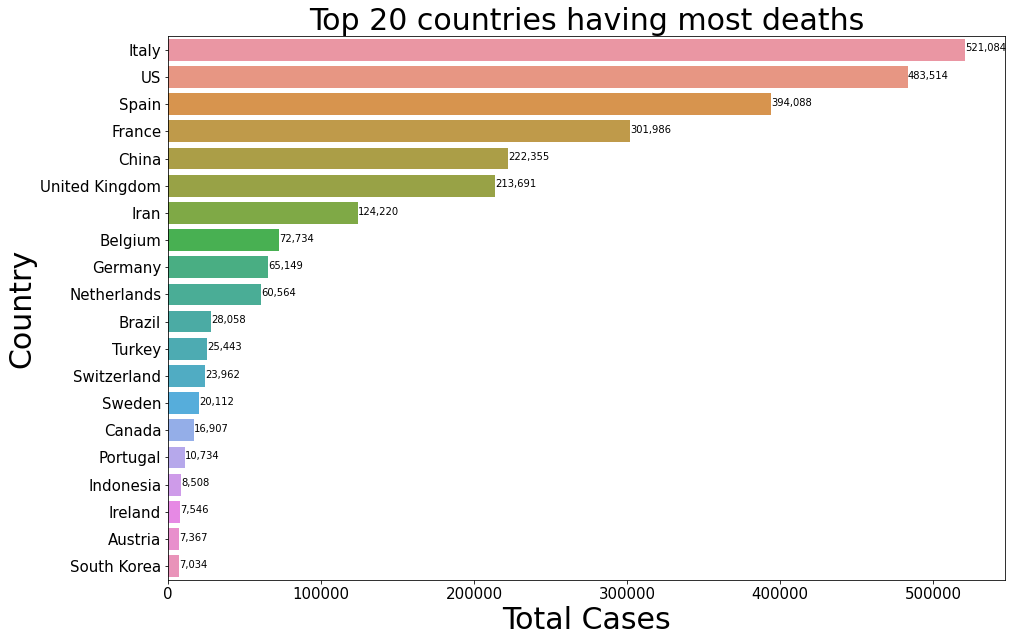

In [37]:
#Visualization of Top 20 Countries have Death Cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel('Country', fontsize = 30)
plt.title("Top 20 countries having most deaths", fontsize = 30)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths, top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total Cases', ylabel='Country')

In [0]:
#Get Top Countries which have more recovered
top_recovered = data.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

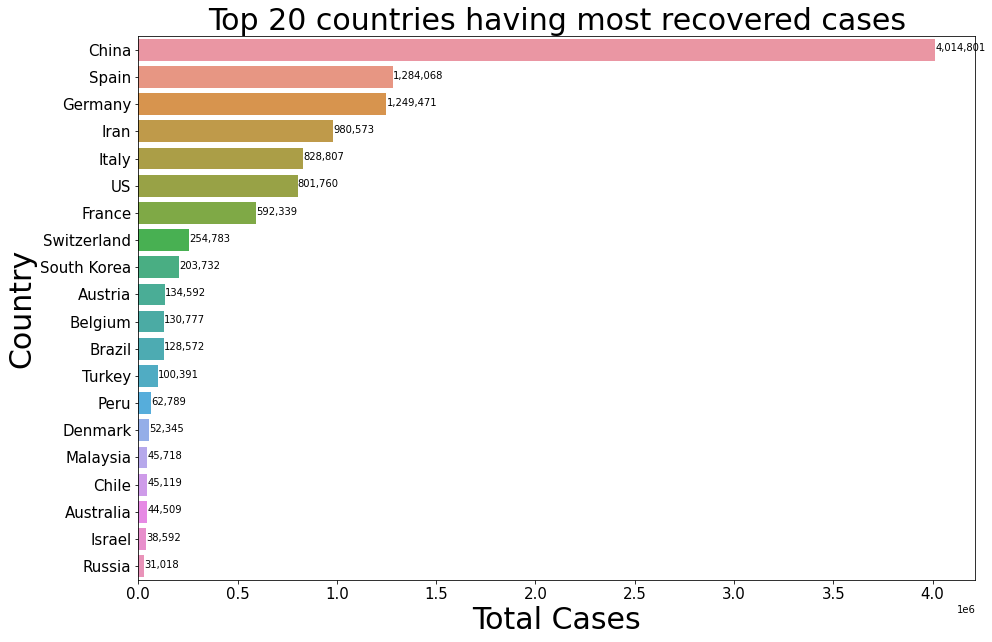

In [39]:
#Visualization of Top 20 Countries have Death Cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel('Country', fontsize = 30)
plt.title("Top 20 countries having most recovered cases", fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered, top_recovered.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total Cases', ylabel='Country')

## **Machine Learning Based Predictions for COVID19 in Sri Lanka**

In [40]:
#Summury of Sri Lanka
sri_lanka = data[data.country == 'Sri Lanka']
sri_lanka = sri_lanka.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
sri_lanka

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
86,2020-04-17,77,7,244,160
87,2020-04-18,86,7,254,161
88,2020-04-19,96,7,271,168
89,2020-04-20,98,7,304,199


In [0]:
#data = pd.read_csv("dataset/covid_19_clean_complete.csv", parse_dates = ['Date'])
data = pd.read_csv("drive/My Drive/4th Year/ML/COVID19_Prediction/dataset/covid_19_clean_complete.csv", parse_dates = ['Date'])
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

#Importing Time Series Based Data
sl_confirmed = pd.read_csv("drive/My Drive/4th Year/ML/COVID19_Prediction/dataset/time_series_covid19_confirmed_global.csv")
sl_deaths = pd.read_csv("drive/My Drive/4th Year/ML/COVID19_Prediction/dataset/time_series_covid19_confirmed_global.csv")
sl_recovered = pd.read_csv("drive/My Drive/4th Year/ML/COVID19_Prediction/dataset/time_series_covid19_confirmed_global.csv")

sl_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
sl_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
sl_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)

In [46]:
sl_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25


In [0]:
#Get COIVD19 Data of Sri Lanka from the Dataset
sri_lanka = data.query('Country == "Sri Lanka"').groupby("Date")[['Confirmed','Deaths','Recovered']].sum().reset_index()
sl_confirmed, sl_deaths, sl_recovered = sri_lanka[['Date','Confirmed']], sri_lanka[['Date','Deaths']], sri_lanka[['Date','Recovered']]

In [0]:
#imports forecasting prediction library
from fbprophet import Prophet

In [0]:
#Confirmed Cases Prediction for Sri Lanka
#ds = dateStamp & y = yet to predict
sl_confirmed.columns = ['ds','y']
sl_confirmed['ds'] = pd.to_datetime(sl_confirmed['ds'])

In [50]:
model = Prophet()
model.fit(sl_confirmed)
future = model.make_future_dataframe(periods=10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
94,2020-04-25,307.208027,299.217876,315.494089
95,2020-04-26,315.067346,306.318276,323.867173
96,2020-04-27,324.234361,315.988977,333.189951
97,2020-04-28,333.247418,325.253889,341.784338
98,2020-04-29,336.620605,328.025115,346.163141
99,2020-04-30,342.162633,332.804805,350.946977
100,2020-05-01,348.627424,339.539367,357.116960


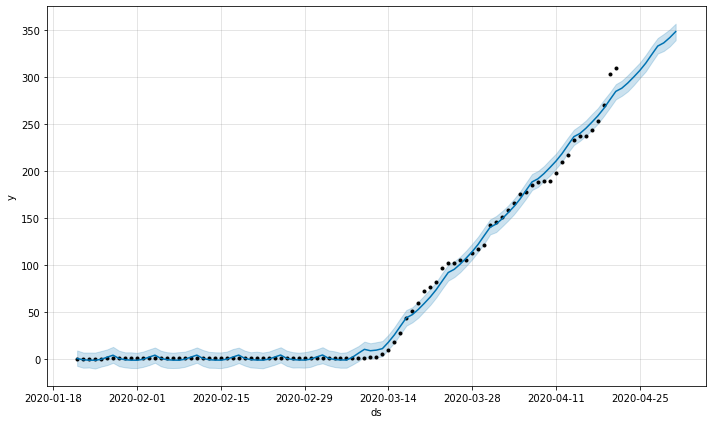

In [52]:
sl_confirmed_plot = model.plot(forecast)

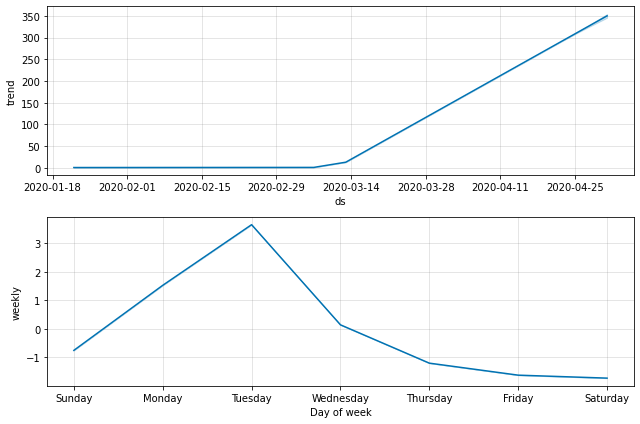

In [53]:
sl_confirmed_plot = model.plot_components(forecast)

In [54]:
#Recovered Cases Prediction for Sri Lanka
sl_recovered.columns = ['ds','y']
sl_recovered['ds'] = pd.to_datetime(sl_recovered['ds'])

model = Prophet()
model.fit(sl_recovered)
future = model.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


In [55]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,117.674638,114.537634,121.001395
97,2020-04-28,121.521106,118.266919,124.883859
98,2020-04-29,124.567405,121.269492,127.794879
99,2020-04-30,128.741111,124.878135,132.569744
100,2020-05-01,132.866986,129.078753,137.038992


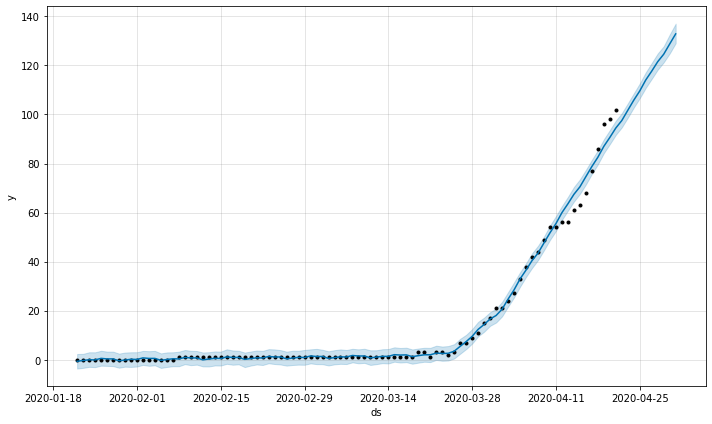

In [56]:
sl_recovered_plot = model.plot(forecast)

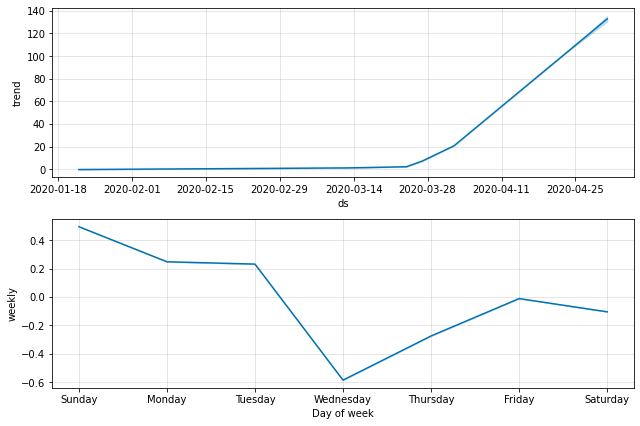

In [57]:
sl_recovered_plot = model.plot_components(forecast)

In [58]:
#Death Cases Prediction for Sri Lanka
sl_deaths.columns = ['ds','y']
sl_deaths['ds'] = pd.to_datetime(sl_deaths['ds'])

model = Prophet()
model.fit(sl_deaths)
future = model.make_future_dataframe(periods=10)
future.tail()

#sl_deaths

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
96,2020-04-27
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01


In [59]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
96,2020-04-27,9.819302,9.028933,10.632122
97,2020-04-28,10.051185,9.250910,10.824265
98,2020-04-29,10.494642,9.652876,11.292020
99,2020-04-30,10.746264,9.906954,11.538881
100,2020-05-01,10.920957,10.083497,11.681368


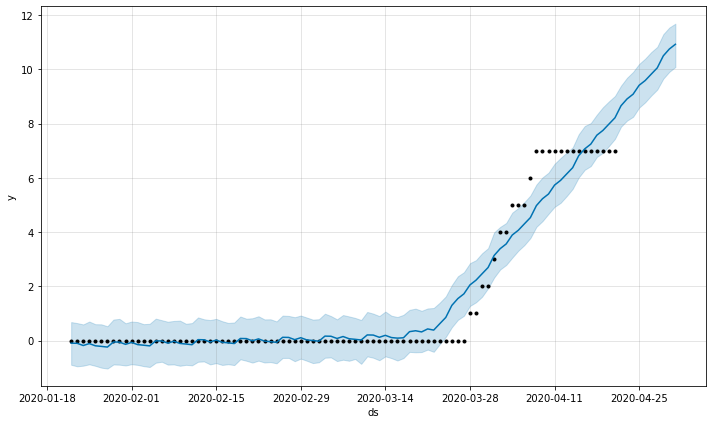

In [60]:
sl_deaths_plot = model.plot(forecast)

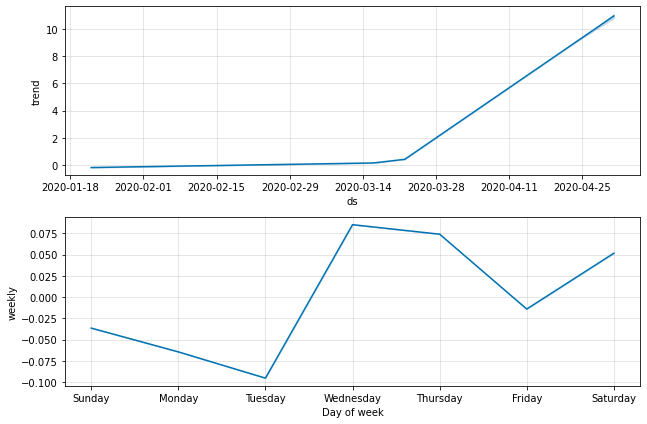

In [61]:
sl_deaths_plot = model.plot_components(forecast)